<a href="https://colab.research.google.com/github/KhumairahErnas/Tugas2_JST/blob/main/Tugas2_Khumairah_JST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the Excel file from Google Drive (update with your file path)
file_path = '/content/drive/MyDrive/Tugas2_JST/Input_JST.xlsx'
df = pd.read_excel(file_path)

In [4]:
# Prepare the dataset
X = df[['Jumlah Unit Terjual', 'Harga', 'Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)', 'Penilaian Pelanggan']]
y = df['Terjual Cepat (1 = Terjual Cepat, 0 = Tidak Terjual Cepat)']

In [5]:
# Convert 'y' to categorical data for multi-class classification
y_categorical = tf.keras.utils.to_categorical(y, num_classes=2) # 2 classes: Terjual Cepat (1) dan Tidak Terjual Cepat (0)

In [6]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Define the neural network model with the specified architecture
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(4,)), # Input layer with 4 neurons
tf.keras.layers.Dense(5, activation='relu'), # Hidden Layer 1 with 5 neurons
tf.keras.layers.Dense(3, activation='relu'), # Hidden Layer 2 with 3 neurons
tf.keras.layers.Dense(2, activation='softmax') # Output Layer with 2 neurons (softmax for multi-class classification)
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4993 - loss: 0.6895 - val_accuracy: 0.6667 - val_loss: 0.6620
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6171 - loss: 0.6729 - val_accuracy: 0.6875 - val_loss: 0.6489
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6804 - loss: 0.6613 - val_accuracy: 0.7292 - val_loss: 0.6366
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7338 - loss: 0.6483 - val_accuracy: 0.7500 - val_loss: 0.6246
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7070 - loss: 0.6487 - val_accuracy: 0.7708 - val_loss: 0.6134
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7295 - loss: 0.6409 - val_accuracy: 0.8125 - val_loss: 0.6019
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7550 - loss: 0.6303 - val_accuracy: 0.8333 - val_loss: 0.5899
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8096 - loss: 0.6043 - val_accuracy: 0.8333 - val_loss

In [11]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8812 - loss: 0.2692  
Test Accuracy: 0.9000
Test Loss: 0.2529


In [12]:
# Plotting the training and validation loss and accuracy
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

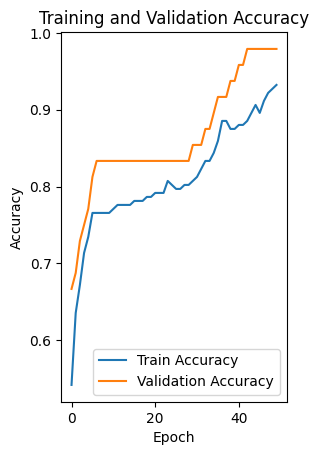

In [13]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

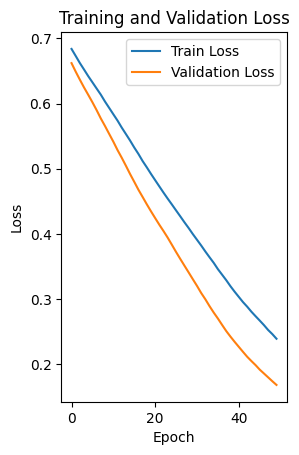

In [14]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [15]:
# Show the plots
plt.show()

In [16]:
# ----- Predict on new data -----
# Example: Data baru yang ingin diujicobakan
new_data = pd.DataFrame({
'Jumlah Unit Terjual': [200, 50, 400], # Jumlah unit terjual
'Harga': [2500, 1500, 3500], # Harga yang sudah disesuaikan dengan kategori
'Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)': [0, 1, 2], # Kategori produk
'Penilaian Pelanggan': [4.5, 3.0, 5.0] # Penilaian Pelanggan
})

In [17]:
# Standardize the new data
new_data_scaled = scaler.transform(new_data)

In [18]:
# Predict using the trained model
predictions = model.predict(new_data_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [19]:
# Get class labels for each prediction
predicted_classes = np.argmax(predictions, axis=1) # Convert from one-hot encoded to class labels (0 or 1)

In [20]:
# Map class labels to 'Terjual Cepat' or 'Tidak Terjual Cepat'
class_labels = ['Tidak Terjual Cepat', 'Terjual Cepat']
predicted_labels = [class_labels[cls] for cls in predicted_classes]
new_data['Prediksi'] = predicted_labels
print("\nPrediksi untuk data baru:")
print(new_data)


Prediksi untuk data baru:
   Jumlah Unit Terjual  Harga  \
0                  200   2500   
1                   50   1500   
2                  400   3500   

   Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)  \
0                                                  0            
1                                                  1            
2                                                  2            

   Penilaian Pelanggan             Prediksi  
0                  4.5        Terjual Cepat  
1                  3.0  Tidak Terjual Cepat  
2                  5.0        Terjual Cepat  
